In [96]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import xgboost as xgb
import warnings
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc
from sklearn.svm import SVC
warnings.filterwarnings('ignore')

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
0,id_119,540,0.000007,557.998222,221.396848,1697,6343,0.231201,0.157785,389.697535,...,244.045421,0.202010,0.019898,5.741075,2.535960,73,31590,1942.588003,97106.70791,55120
1,id_143,1800,0.000008,254.998848,169.725972,1476,7247,0.203489,0.153118,212.362410,...,180.306786,0.106158,0.020339,3.220606,2.324440,103,28280,1674.497878,224182.68560,61885
2,id_164,2740,0.000009,354.518156,289.414055,1831,9729,0.311624,0.216704,321.966106,...,188.204705,0.113037,0.017907,3.281408,2.635369,110,55115,1648.218997,219329.47010,124760
3,id_39,2635,0.000007,261.166647,147.334293,2099,3936,0.620047,0.149459,204.250470,...,225.085577,0.091910,0.022776,4.458446,3.211986,93,27320,1491.778917,235001.24650,50155
4,id_140,2975,0.000009,396.225929,153.497310,1628,7466,0.602640,0.148833,274.861619,...,407.395427,0.375078,0.022148,8.964604,5.292562,68,27560,1718.044086,142453.21450,37840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,id_72,2615,0.000014,637.692285,228.919963,2105,13749,0.268277,0.155770,433.306124,...,263.058996,0.167926,0.026026,5.473425,3.674722,98,30115,1939.105761,101814.91310,75615
135,id_107,2380,0.000007,150.688702,170.070042,1872,4892,0.408521,0.162480,160.379372,...,187.005105,0.089351,0.019781,3.431968,2.628899,106,46350,1561.181230,292377.27850,97400
136,id_15,2900,0.000011,305.092663,130.501402,1214,8202,0.979940,0.127559,217.797032,...,105.215372,0.071264,0.017608,1.844563,1.505821,84,55645,874.566718,153968.14580,117830
137,id_93,5395,0.000013,152.234441,133.638302,1939,9778,0.191476,0.157144,142.936372,...,284.323967,0.204001,0.020445,5.156128,3.776394,61,22735,1850.260391,154122.41430,53235


In [98]:
# Reading the dataset
X = pd.read_csv("DataSet/train_data/train-data.csv")
y = pd.read_csv("DataSet/train_data/train-data-output.csv")
# loading all models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(kernel="rbf", C=1.0),
    "Random Forest Classifier": RandomForestClassifier(),
    "XG Boost Classifier": xgb.XGBClassifier(),
    "LightGBM": lgb.LGBMClassifier(verbose=-1),
    "DecisionTree": DecisionTreeClassifier()
}
# No need of preprocessing as no nan values found 
# X = df.drop("class", inplace=False, axis=1)
# y = df['class']
X.drop("ID", axis=1, inplace=True)
# Encoding Labels of Class
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# Split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
# Scaling the data for models SVM and LogisticRegression
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
accuracy_scores = dict()
f1_scores = dict()
roc_curve_details = {}
for model_name, model in models.items():
    if model_name == "SVM" or model_name == "Logistic Regression":
        model.fit(X_train_scaled, y_train)
        pred = model.predict(X_test_scaled)
        accuracy_scores[model_name] = accuracy_score(y_test, pred) * 100
        f1_scores[model_name] = f1_score(y_test, pred) * 100
        fpr, tpr, _ = roc_curve(y_test, pred)
        roc_curve_details[model_name] = {'tpr': tpr, 'fpr': fpr}
    else:
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        accuracy_scores[model_name] = accuracy_score(y_test, pred) * 100
        f1_scores[model_name] = f1_score(y_test, pred) * 100
        fpr, tpr, _ = roc_curve(y_test, pred)
        roc_curve_details[model_name] = {'tpr': tpr, 'fpr': fpr}

In [67]:
print("="*80)
print("|\tModel Name\tAccuracy Score\tF1 Score\tArea Under Curve       |")
print("="*80)
for k in accuracy_scores.keys():
    print(f"|{k:^25}{accuracy_scores[k]:>10.2f}{f1_scores[k]:>12.2f}{auc(roc_curve_details[k]['fpr'], roc_curve_details[k]['tpr']):>18.2f}\t       |")
print("="*80)

|	Model Name	Accuracy Score	F1 Score	Area Under Curve       |
|   Logistic Regression        71.43       63.64              0.71	       |
|           SVM                67.86       66.67              0.73	       |
|Random Forest Classifier      85.71       80.00              0.84	       |
|   XG Boost Classifier        85.71       80.00              0.84	       |
|        LightGBM              92.86       90.00              0.92	       |
|      DecisionTree            82.14       78.26              0.84	       |


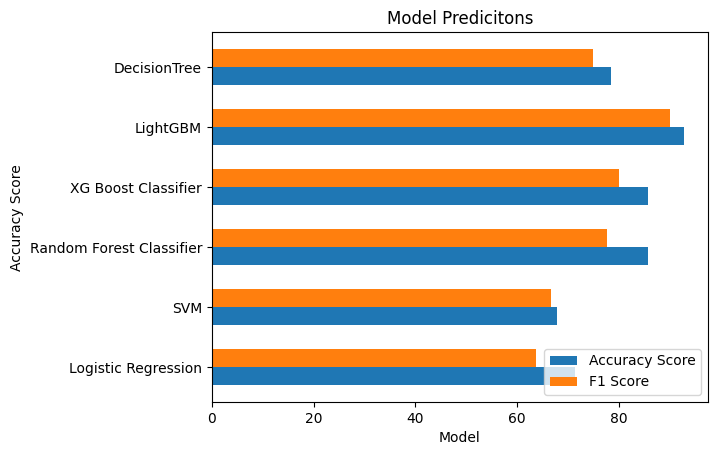

In [99]:
# Creating a bar graph to see which model performed well graphically by utilizing both accuracy_score and f1_score
import matplotlib.pyplot as plt
labels = list(accuracy_scores.keys())
accuracy_scores_list = list(accuracy_scores.values())
f1_scores_list = list(f1_scores.values())
height = 0.3
y = np.arange(len(labels))
fig, ax = plt.subplots()
ax.barh(y - height / 2, accuracy_scores_list, height, label="Accuracy Score")
ax.barh(y + height / 2, f1_scores_list, height, label="F1 Score")
ax.set_yticks(y)
ax.set_yticklabels(labels)
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.title("Model Predicitons")
plt.legend()
plt.show()

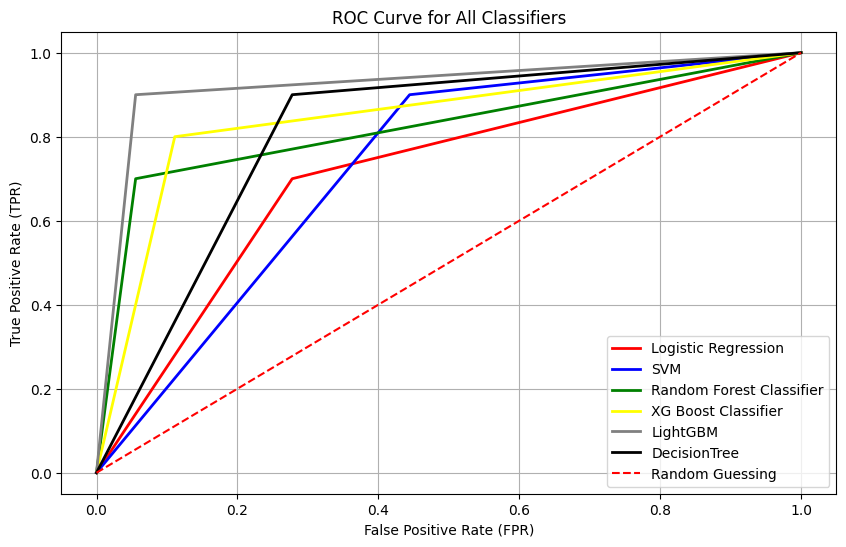

In [102]:
# By seeing this we can conclude that XG Boost Model is performing best comparing to the rest 
# Lets make a ROC curve for XG Boost Classifier and see the details
# fpr, tpr = roc_curve_details['XG Boost Classifier']['fpr'], roc_curve_details['XG Boost Classifier']['tpr']
# fpr_lr, tpr_lr = roc_curve_details['Logistic Regression']['fpr'], roc_curve_details['Logistic Regression']['tpr']
# plt.figure(figsize=(7,5))
# plt.plot(fpr, tpr, color='blue', label="XGBoost ROC Curve")
# plt.plot(fpr_lr, tpr_lr, color="red", label="Logistic Regression Curve")
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'yellow', 'gray', 'black']
i = 0
for model in roc_curve_details:
    plt.plot(roc_curve_details[model]['fpr'], roc_curve_details[model]['tpr'], color=colors[i], label=model, linewidth=2)
    i += 1
plt.plot([0, 1], [0, 1], color='red', linestyle="--", label="Random Guessing")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for All Classifiers")
plt.legend()
plt.grid(True)
plt.show()